In [92]:
import numpy as np


s=np.array([[5,3],[6,4]])
t=np.array([[1,4],[2,6]])

print('s inv')
sinv=np.linalg.inv(s)
print(sinv)
print('sinv.s')
print(np.dot(sinv,s))
print('s-1 . T')
print(np.dot(sinv,t))

p=np.array([[7,2],[3,5]])
q=np.array([[9,4],[3,1]])

print (p@q)


f=np.array([[1,2],[2,6]])
g=[[3,6],[7,1]]

print (np.linalg.inv(f))

print (np.linalg.inv(f)@g)

v = np.array([6,2])
w=np.array([3,5])

print(v@w)



s inv
[[ 2.  -1.5]
 [-3.   2.5]]
sinv.s
[[ 1.00000000e+00  8.88178420e-16]
 [-3.55271368e-15  1.00000000e+00]]
s-1 . T
[[-1. -1.]
 [ 2.  3.]]
[[69 30]
 [42 17]]
[[ 3.  -1. ]
 [-1.   0.5]]
[[ 2.  17. ]
 [ 0.5 -5.5]]
28


# Transformations, Eigenvectors, and Eigenvalues

Matrices and vectors are used together to manipulate spatial dimensions. This has a lot of applications, including the mathematical generation of 3D computer graphics, geometric modeling, and the training and optimization of machine learning algorithms. We're not going to cover the subject exhaustively here; but we'll focus on a few key concepts that are useful to know when you plan to work with machine learning.

## Linear Transformations
You can manipulate a vector by multiplying it with a matrix. The matrix acts a function that operates on an input vector to produce a vector output. Specifically, matrix multiplications of vectors are *linear transformations* that transform the input vector into the output vector.

For example, consider this matrix ***A*** and vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

We can define a transformation ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

To perform this transformation, we simply calculate the dot product by applying the *RC* rule; multiplying each row of the matrix by the single column of the vector:

$$\begin{bmatrix}2 & 3\\5 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\end{bmatrix}$$

Here's the calculation in Python:

In [1]:
import numpy as np

v = np.array([1,2])
A = np.array([[2,3],
              [5,2]])

t = A@v
print (t)

[8 9]


In this case, both the input vector and the output vector have 2 components - in other words, the transformation takes a 2-dimensional vector and produces a new 2-dimensional vector; which we can indicate like this:

$$ T: \rm I\!R^{2} \to \rm I\!R^{2} $$

Note that the output vector may have a different number of dimensions from the input vector; so the matrix function might transform the vector from one space to another - or in notation, ${\rm I\!R}$<sup>n</sup> -> ${\rm I\!R}$<sup>m</sup>.

For example, let's redefine matrix ***A***, while retaining our original definition of vector ***v***:

$$ A = \begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\2\end{bmatrix}$$

Now if we once again define ***T*** like this:

$$ T(\vec{v}) = A\vec{v} $$

We apply the transformation like this:

$$\begin{bmatrix}2 & 3\\5 & 2\\1 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\2\end{bmatrix} = \begin{bmatrix}8\\9\\3\end{bmatrix}$$

So now, our transformation transforms the vector from 2-dimensional space to 3-dimensional space:

$$ T: \rm I\!R^{2} \to \rm I\!R^{3} $$

Here it is in Python:

In [ ]:
import numpy as np
v = np.array([1,2])
A = np.array([[2,3],
              [5,2],
              [1,1]])

t = A@v
print (t)

In [ ]:
import numpy as np
v = np.array([1,2])
A = np.array([[1,2],
              [2,1]])

t = A@v
print (t)

## Transformations of Magnitude and Amplitude

When you multiply a vector by a matrix, you transform it in at least one of the following two ways:
* Scale the length (*magnitude*) of the matrix to make it longer or shorter
* Change the direction (*amplitude*) of the matrix

For example consider the following matrix and vector:

$$ A = \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \;\;\;\; \vec{v} = \begin{bmatrix}1\\0\end{bmatrix}$$

As before, we transform the vector ***v*** by multiplying it with the matrix ***A***:

\begin{equation}\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}\end{equation}

In this case, the resulting vector has changed in length (*magnitude*), but has not changed its direction (*amplitude*).

Let's visualize that in Python:

[2 0]


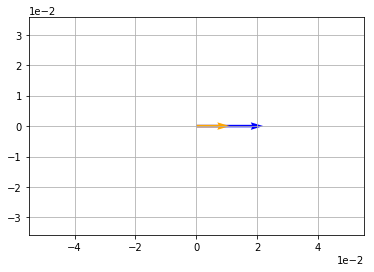

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([t,v])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

The original vector ***v*** is shown in orange, and the transformed vector ***t*** is shown in blue - note that ***t*** has the same direction (*amplitude*) as ***v*** but a greater length (*magnitude*).

Now let's use a different matrix to transform the vector ***v***:
\begin{equation}\begin{bmatrix}0 & -1\\1 & 0\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix}\end{equation}

This time, the resulting vector has been changed to a different amplitude, but has the same magnitude.

[0 1]


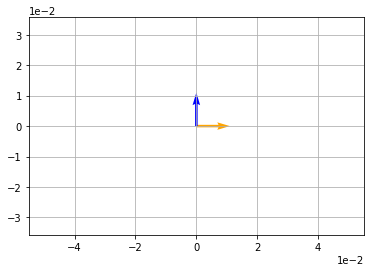

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,0])
A = np.array([[0,-1],
              [1,0]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([v,t])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=10)
plt.show()

Now let's see change the matrix one more time:
\begin{equation}\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\1\end{bmatrix}\end{equation}

Now our resulting vector has been transformed to a new amplitude *and* magnitude - the transformation has affected both direction and scale.

[2 1]


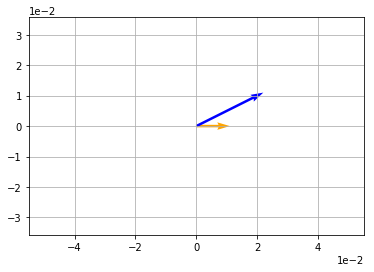

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,0])
A = np.array([[2,1],
              [1,2]])

t = A@v
print (t)

# Plot v and t
vecs = np.array([v,t])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue'], scale=10)
plt.show()

### Afine Transformations
An Afine transformation multiplies a vector by a matrix and adds an offset vector, sometimes referred to as *bias*; like this:

$$T(\vec{v}) = A\vec{v} + \vec{b}$$

For example:

\begin{equation}\begin{bmatrix}5 & 2\\3 & 1\end{bmatrix} \cdot  \begin{bmatrix}1\\1\end{bmatrix} + \begin{bmatrix}-2\\-6\end{bmatrix} = \begin{bmatrix}5\\-2\end{bmatrix}\end{equation}

This kind of transformation is actually the basis of linear regression, which is a core foundation for machine learning. The matrix defines the *features*, the first vector is the *coefficients*, and the bias vector is the *intercept*.

here's an example of an Afine transformation in Python:

[7 4]
[ 5 -2]


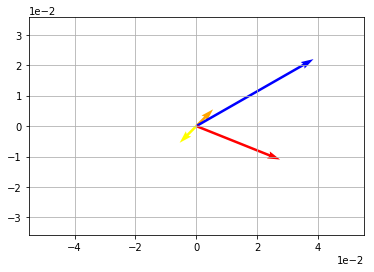

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,1])
A = np.array([[5,2],
              [3,1]])
b = np.array([-2,-6])

s = A@v
t = A@v + b
print (s)
print (t)


# Plot v and t
vecs = np.array([v,s,t])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'blue','red'], scale=20)
plt.quiver(*origin, -1, -1, color=['yellow'], scale=20)

plt.show()

## Eigenvectors and Eigenvalues
So we can see that when you transform a vector using a matrix, we change its direction, length, or both. When the transformation only affects scale (in other words, the output vector has a different magnitude but the same amplitude as the input vector), the matrix multiplication for the transformation is the equivalent operation as some scalar multiplication of the vector.

For example, earlier we examined the following transformation that dot-mulitplies a vector by a matrix:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

You can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

The following python performs both of these calculation and shows the results, which are identical.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([1,0])
A = np.array([[2,0],
              [0,2]])

t1 = A@v
print (t1)
t2 = 2*v
print (t2)

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,v])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,v])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

In cases like these, where a matrix transformation is the equivelent of a scalar-vector multiplication, the scalar-vector pairs that correspond to the matrix are known respectively as eigenvalues and eigenvectors. We generally indicate eigenvalues using the Greek letter lambda (&lambda;), and the formula that defines eigenvalues and eigenvectors with respect to a transformation is:

$$ T(\vec{v}) = \lambda\vec{v}$$

Where the vector ***v*** is an eigenvector and the value ***&lambda;*** is an eigenvalue for transformation ***T***.

When the transformation ***T*** is represented as a matrix multiplication, as in this case where the transformation is represented by matrix ***A***:

$$ T(\vec{v}) = A\vec{v} = \lambda\vec{v}$$

Then  ***v*** is an eigenvector and ***&lambda;*** is an eigenvalue of ***A***.

A matrix can have multiple eigenvector-eigenvalue pairs, and you can calculate them manually. However, it's generally easier to use a tool or programming language. For example, in Python you can use the ***linalg.eig*** function, which returns an array of eigenvalues and a matrix of the corresponding eigenvectors for the specified matrix.

Here's an example that returns the eigenvalue and eigenvector pairs for the following matrix:

$$A=\begin{bmatrix}2 & 0\\0 & 3\end{bmatrix}$$

In [16]:
import numpy as np
A = np.array([[2,0],
              [0,3]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 3.]
[[1. 0.]
 [0. 1.]]


So there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 3, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

So far so good. Now let's check the second pair:

$$ 3 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 3\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 3\end{bmatrix} $$

So our eigenvalue-eigenvector scalar multiplications do indeed correspond to our matrix-eigenvector dot-product transformations.

Here's the equivalent code in Python, using the ***eVals*** and ***eVecs*** variables you generated in the previous code cell:

In [61]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print(vec1)

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))

[1. 0.]
Matrix A:
[[3 2]
 [1 0]]
-------
lam1: 2.0
v1: [1. 0.]
Av1: [3. 1.]
lam1 x v1: [2. 0.]
-------
lam2: 3.0
v2: [0. 1.]
Av2: [2. 0.]
lam2 x v2: [0. 3.]


You can use the following code to visualize these transformations:

[2. 0.]
[0. 3.]


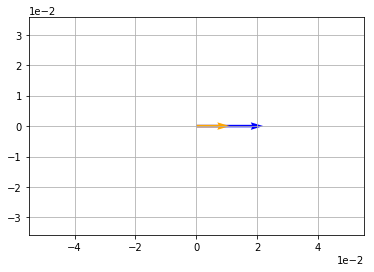

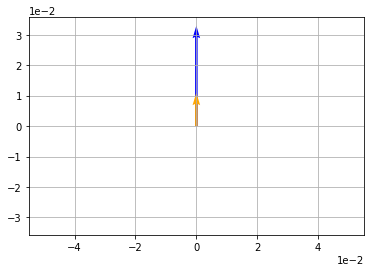

In [4]:
t1 = lam1*vec1
print (t1)
t2 = lam2*vec2
print (t2)

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,vec2])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

Similarly, earlier we examined the following matrix transformation:

$$\begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot  \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

And we saw that you can achieve the same result by mulitplying the vector by the scalar value ***2***:

$$2 \times \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}2\\0\end{bmatrix}$$

This works because the scalar value 2 and the vector (1,0) are an eigenvalue-eigenvector pair for this matrix.

Let's use Python to determine the eigenvalue-eigenvector pairs for this matrix:

In [5]:
import numpy as np
A = np.array([[2,0],
              [0,2]])
eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

[2. 2.]
[[1. 0.]
 [0. 1.]]


So once again, there are two eigenvalue-eigenvector pairs for this matrix, as shown here:

$$ \lambda_{1} = 2, \vec{v_{1}} = \begin{bmatrix}1 \\ 0\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 2, \vec{v_{2}} = \begin{bmatrix}0 \\ 1\end{bmatrix} $$

Let's verify that multiplying each eigenvalue-eigenvector pair corresponds to the dot-product of the eigenvector and the matrix. Here's the first pair:

$$ 2 \times \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}2 \\ 0\end{bmatrix} $$

Well, we already knew that. Now let's check the second pair:

$$ 2 \times \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 0\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 2\end{bmatrix} $$

Now let's use Pythonto verify and plot these transformations:

In [ ]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))


# Plot the resulting vectors
t1 = lam1*vec1
t2 = lam2*vec2

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,vec2])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

Let's take a look at one more, slightly more complex example. Here's our matrix:

$$\begin{bmatrix}2 & 1\\1 & 2\end{bmatrix}$$

Let's get the eigenvalue and eigenvector pairs:

In [ ]:
import numpy as np

A = np.array([[2,1],
              [1,2]])

eVals, eVecs = np.linalg.eig(A)
print(eVals)
print(eVecs)

This time the eigenvalue-eigenvector pairs are:

$$ \lambda_{1} = 3, \vec{v_{1}} = \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix}  \;\;\;\;\;\; \lambda_{2} = 1, \vec{v_{2}} = \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} $$

So let's check the first pair:

$$ 3 \times \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\0 & 2\end{bmatrix} \cdot \begin{bmatrix}0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}2.12132034 \\ 2.12132034\end{bmatrix} $$

Now let's check the second pair:

$$ 1 \times \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix}  \;\;\;and\;\;\; \begin{bmatrix}2 & 1\\1 & 2\end{bmatrix} \cdot \begin{bmatrix}-0.70710678 \\ 0.70710678\end{bmatrix} = \begin{bmatrix}-0.70710678\\0.70710678\end{bmatrix} $$

With more complex examples like this, it's generally easier to do it with Python:

In [ ]:
vec1 = eVecs[:,0]
lam1 = eVals[0]

print('Matrix A:')
print(A)
print('-------')

print('lam1: ' + str(lam1))
print ('v1: ' + str(vec1))
print ('Av1: ' + str(A@vec1))
print ('lam1 x v1: ' + str(lam1*vec1))

print('-------')

vec2 = eVecs[:,1]
lam2 = eVals[1]

print('lam2: ' + str(lam2))
print ('v2: ' + str(vec2))
print ('Av2: ' + str(A@vec2))
print ('lam2 x v2: ' + str(lam2*vec2))


# Plot the results
t1 = lam1*vec1
t2 = lam2*vec2

fig = plt.figure()
a=fig.add_subplot(1,1,1)
# Plot v and t1
vecs = np.array([t1,vec1])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()
a=fig.add_subplot(1,2,1)
# Plot v and t2
vecs = np.array([t2,vec2])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['blue', 'orange'], scale=10)
plt.show()

## Eigendecomposition
So we've learned a little about eigenvalues and eigenvectors; but you may be wondering what use they are. Well, one use for them is to help decompose transformation matrices.

Recall that previously we found that a matrix transformation of a vector changes its magnitude, amplitude, or both. Without getting too technical about it, we need to remember that vectors can exist in any spatial orientation, or *basis*; and the same transformation can be applied in different *bases*.

We can decompose a matrix using the following formula:

$$A = Q \Lambda Q^{-1}$$

Where ***A*** is a trasformation that can be applied to a vector in its current base, ***Q*** is a matrix of eigenvectors that defines a change of basis, and ***&Lambda;*** is a matrix with eigenvalues on the diagonal that defines the same linear transformation as ***A*** in the base defined by ***Q***.

Let's look at these in some more detail. Consider this matrix:

$$A=\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix}$$

***Q*** is a matrix in which each column is an eigenvector of ***A***; which as we've seen previously, we can calculate using Python:

In [49]:
import numpy as np

A = np.array([[3,2],
              [1,0]])

v = np.array([3,4])

l, Q = np.linalg.eig(A)
print(Q)
print(l)

print(np.dot(A,v))



[[ 0.96276969 -0.48963374]
 [ 0.27032301  0.87192821]]
[ 3.56155281 -0.56155281]
[17  3]


So for matrix ***A***, ***Q*** is the following matrix:

$$Q=\begin{bmatrix}0.96276969 & -0.48963374\\0.27032301 & 0.87192821\end{bmatrix}$$

***&Lambda;*** is a matrix that contains the eigenvalues for ***A*** on the diagonal, with zeros in all other elements; so for a 2x2 matrix, &Lambda; will look like this:

$$\Lambda=\begin{bmatrix}\lambda_{1} & 0\\0 & \lambda_{2}\end{bmatrix}$$

In our Python code, we've already used the ***linalg.eig*** function to return the array of eigenvalues for ***A*** into the variable ***l***, so now we just need to format that as a matrix:

In [50]:
L = np.diag(l)
print (L)

[[ 3.56155281  0.        ]
 [ 0.         -0.56155281]]


So ***&Lambda;*** is the following matrix:

$$\Lambda=\begin{bmatrix}3.56155281 & 0\\0 & -0.56155281\end{bmatrix}$$

Now we just need to find ***Q<sup>-1</sup>***, which is the inverse of ***Q***:

In [53]:
Qinv = np.linalg.inv(Q)
print(Qinv)

[[ 0.89720673  0.50382896]
 [-0.27816009  0.99068183]]


The inverse of ***Q*** then, is:

$$Q^{-1}=\begin{bmatrix}0.89720673 & 0.50382896\\-0.27816009 & 0.99068183\end{bmatrix}$$

So what does that mean? Well, it means that we can decompose the transformation of *any* vector multiplied by matrix ***A*** into the separate operations ***Q&Lambda;Q<sup>-1</sup>***:

$$A\vec{v} = Q \Lambda Q^{-1}\vec{v}$$

To prove this, let's take vector ***v***:

$$\vec{v} = \begin{bmatrix}1\\3\end{bmatrix} $$

Our matrix transformation using ***A*** is:

$$\begin{bmatrix}3 & 2\\1 & 0\end{bmatrix} \cdot \begin{bmatrix}1\\3\end{bmatrix} $$

So let's show the results of that using Python:

In [68]:
v = np.array([1,3])
t = A@v
print(np.dot(A,v))

print(t)

print(A*v)
print(np.cross(A,v))

print('ok stikk confused')
print(np.array([1,2])*np.array([[3],[4]]))
print(np.cross(np.array([1,2]),np.array([[3],[4]])))


# Plot v and t
vecs = np.array([v,t])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'b'], scale=20)
plt.show()

[9 1]
[9 1]
[[3 6]
 [1 0]]
[7 3]
ok stikk confused
[[3 6]
 [4 8]]


ValueError: incompatible dimensions for cross product
(dimension must be 2 or 3)

And now, let's do the same thing using the ***Q&Lambda;Q<sup>-1</sup>*** sequence of operations:

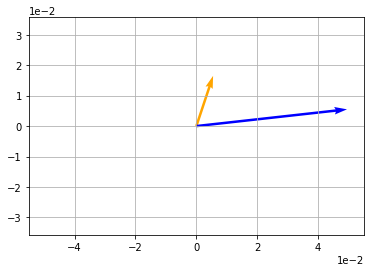

In [54]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t = (Q@(L@(Qinv)))@v

# Plot v and t
vecs = np.array([v,t])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'b'], scale=20)
plt.show()

So ***A*** and ***Q&Lambda;Q<sup>-1</sup>*** are equivalent.

If we view the intermediary stages of the decomposed transformation, you can see the transformation using ***A*** in the original base for ***v*** (orange to blue) and the transformation using ***&Lambda;*** in the change of basis decribed by ***Q*** (red to magenta):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t1 = Qinv@v
t2 = L@t1
t3 = Q@t2

# Plot the transformations
vecs = np.array([v,t1, t2, t3])
origin = [0], [0]
plt.axis('equal')
plt.grid()
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.quiver(*origin, vecs[:,0], vecs[:,1], color=['orange', 'red', 'magenta', 'blue'], scale=20)
plt.show()

So from this visualization, it should be apparent that the transformation ***Av*** can be performed by changing the basis for ***v*** using ***Q*** (from orange to red in the above plot) applying the equivalent linear transformation in that base using ***&Lambda;*** (red to magenta), and switching back to the original base using ***Q<sup>-1</sup>*** (magenta to blue).

## Rank of a Matrix

The **rank** of a square matrix is the number of non-zero eigenvalues of the matrix. A **full rank** matrix has the same number of non-zero eigenvalues as the dimension of the matrix. A **rank-deficient** matrix has fewer non-zero eigenvalues as dimensions. The inverse of a rank deficient matrix is singular and so does not exist (this is why in a previous notebook we noted that some matrices have no inverse).

Consider the following matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

Let's find its eigenvalues (***&Lambda;***):

In [ ]:
import numpy as np
A = np.array([[1,2],
              [4,3]])
l, Q = np.linalg.eig(A)
L = np.diag(l)
print(L)

$$\Lambda=\begin{bmatrix}-1 & 0\\0 & 5\end{bmatrix}$$

This matrix has full rank. The dimensions of the matrix is 2. There are two non-zero eigenvalues. 

Now consider this matrix:

$$B=\begin{bmatrix}3 & -3 & 6\\2 & -2 & 4\\1 & -1 & 2\end{bmatrix}$$

Note that the second and third columns are just scalar multiples of the first column.

Let's examine it's eigenvalues:

In [ ]:
B = np.array([[3,-3,6],
              [2,-2,4],
              [1,-1,2]])
lb, Qb = np.linalg.eig(B)
Lb = np.diag(lb)
print(Lb)

$$\Lambda=\begin{bmatrix}3 & 0& 0\\0 & -6\times10^{-17} & 0\\0 & 0 & 3.6\times10^{-16}\end{bmatrix}$$

Note that matrix has only 1 non-zero eigenvalue. The other two eigenvalues are so extremely small as to be effectively zero. This is an example of a rank-deficient matrix; and as such, it has no inverse.

## Inverse of a Square Full Rank Matrix
You can calculate the inverse of a square full rank matrix by using the following formula:

$$A^{-1} = Q \Lambda^{-1} Q^{-1}$$

Let's apply this to matrix ***A***:

$$A=\begin{bmatrix}1 & 2\\4 & 3\end{bmatrix}$$

Let's find the matrices for ***Q***, ***&Lambda;<sup>-1</sup>***, and ***Q<sup>-1</sup>***:

In [ ]:
import numpy as np
A = np.array([[1,2],
              [4,3]])

l, Q = np.linalg.eig(A)
L = np.diag(l)
print(Q)
Linv = np.linalg.inv(L)
Qinv = np.linalg.inv(Q)
print(Linv)
print(Qinv)

So:

$$A^{-1}=\begin{bmatrix}-0.70710678 & -0.4472136\\0.70710678 & -0.89442719\end{bmatrix}\cdot\begin{bmatrix}-1 & -0\\0 & 0.2\end{bmatrix}\cdot\begin{bmatrix}-0.94280904 & 0.47140452\\-0.74535599 & -0.74535599\end{bmatrix}$$

Let's calculate that in Python:

In [ ]:
Ainv = (Q@(Linv@(Qinv)))
print(Ainv)

That gives us the result:

$$A^{-1}=\begin{bmatrix}-0.6 & 0.4\\0.8 & -0.2\end{bmatrix}$$

We can apply the ***np.linalg.inv*** function directly to ***A*** to verify this:

In [ ]:
print(np.linalg.inv(A))